# Implizite Verfahren zur Lösung der Wärmeleitungsgleichung

## Lösung dünn besetzter Gleichungssysteme
engl.: Sparse linear systems

In [1]:
import scipy
import scipy.sparse
import numpy as np
import matplotlib.pyplot as plt

### Erinnerung: Lösung eines (einigermaßen) dicht besetzten Gleichungssystems

In [3]:
A = np.array([2, 1, 0, 1, 2, 1, 0, 1 ,2]).reshape(3,3)
A

array([[2, 1, 0],
       [1, 2, 1],
       [0, 1, 2]])

In [4]:
np.linalg.det(A)

4.0

In [5]:
b = np.array([3, 4, 3])
b

array([3, 4, 3])

In [6]:
np.linalg.solve(A, b)

array([1., 1., 1.])

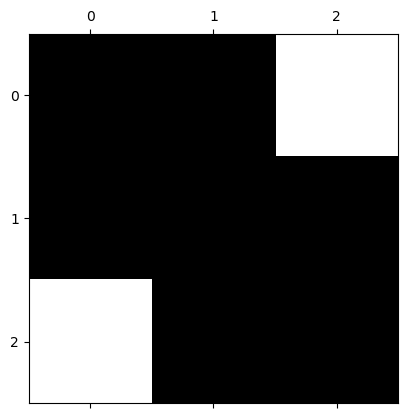

In [7]:
plt.spy(A) # Visualisierung der Nicht-Nulleinträge der Matrix A

### Darstellung von A als dünn besetzte Matrix
#### CSR (Compressed Sparse Row)

In [8]:
A_sp = scipy.sparse.csr_matrix(A)

In [9]:
A_sp

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

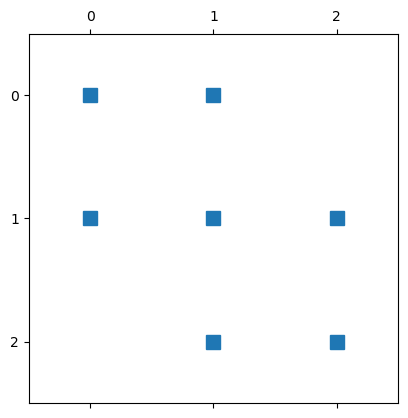

In [10]:
plt.spy(A_sp)

In [11]:
print(A_sp)

  (0, 0)	2
  (0, 1)	1
  (1, 0)	1
  (1, 1)	2
  (1, 2)	1
  (2, 1)	1
  (2, 2)	2


## Dünn besetzte Tridiagonalmatrix

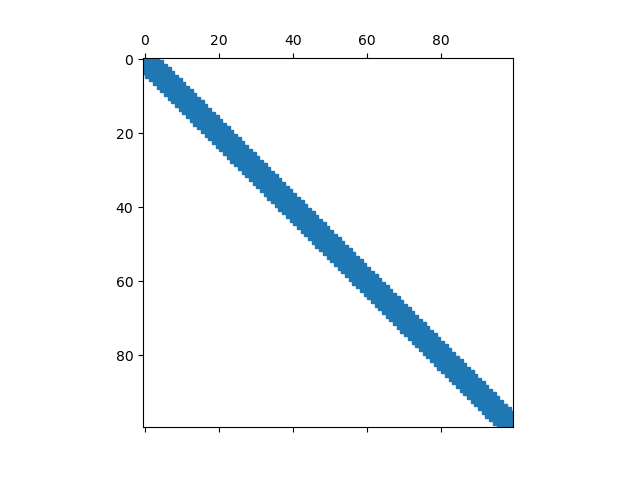

In [13]:
%matplotlib widget
from scipy import sparse

N = 100
alpha = 0.24


diag0 = (1 + 2*alpha) * np.ones(N)
diag1 = -alpha*np.ones(N)

data = np.array([diag1, diag0, diag1])

LInv = sparse.spdiags(data, (-1, 0, 1), N, N)
#LInv.todense()
plt.spy(LInv)

In [14]:
#x0 = np.ones(N)
x0 = np.arange(N)
rhs = LInv @ x0
rhs

array([ -0.24,   1.  ,   2.  ,   3.  ,   4.  ,   5.  ,   6.  ,   7.  ,
         8.  ,   9.  ,  10.  ,  11.  ,  12.  ,  13.  ,  14.  ,  15.  ,
        16.  ,  17.  ,  18.  ,  19.  ,  20.  ,  21.  ,  22.  ,  23.  ,
        24.  ,  25.  ,  26.  ,  27.  ,  28.  ,  29.  ,  30.  ,  31.  ,
        32.  ,  33.  ,  34.  ,  35.  ,  36.  ,  37.  ,  38.  ,  39.  ,
        40.  ,  41.  ,  42.  ,  43.  ,  44.  ,  45.  ,  46.  ,  47.  ,
        48.  ,  49.  ,  50.  ,  51.  ,  52.  ,  53.  ,  54.  ,  55.  ,
        56.  ,  57.  ,  58.  ,  59.  ,  60.  ,  61.  ,  62.  ,  63.  ,
        64.  ,  65.  ,  66.  ,  67.  ,  68.  ,  69.  ,  70.  ,  71.  ,
        72.  ,  73.  ,  74.  ,  75.  ,  76.  ,  77.  ,  78.  ,  79.  ,
        80.  ,  81.  ,  82.  ,  83.  ,  84.  ,  85.  ,  86.  ,  87.  ,
        88.  ,  89.  ,  90.  ,  91.  ,  92.  ,  93.  ,  94.  ,  95.  ,
        96.  ,  97.  ,  98.  , 123.  ])

In [16]:
from scipy.sparse.linalg import spsolve
LInv = LInv.tocsr()
x = spsolve(LInv, rhs)
x

array([-2.77555756e-17,  1.00000000e+00,  2.00000000e+00,  3.00000000e+00,
        4.00000000e+00,  5.00000000e+00,  6.00000000e+00,  7.00000000e+00,
        8.00000000e+00,  9.00000000e+00,  1.00000000e+01,  1.10000000e+01,
        1.20000000e+01,  1.30000000e+01,  1.40000000e+01,  1.50000000e+01,
        1.60000000e+01,  1.70000000e+01,  1.80000000e+01,  1.90000000e+01,
        2.00000000e+01,  2.10000000e+01,  2.20000000e+01,  2.30000000e+01,
        2.40000000e+01,  2.50000000e+01,  2.60000000e+01,  2.70000000e+01,
        2.80000000e+01,  2.90000000e+01,  3.00000000e+01,  3.10000000e+01,
        3.20000000e+01,  3.30000000e+01,  3.40000000e+01,  3.50000000e+01,
        3.60000000e+01,  3.70000000e+01,  3.80000000e+01,  3.90000000e+01,
        4.00000000e+01,  4.10000000e+01,  4.20000000e+01,  4.30000000e+01,
        4.40000000e+01,  4.50000000e+01,  4.60000000e+01,  4.70000000e+01,
        4.80000000e+01,  4.90000000e+01,  5.00000000e+01,  5.10000000e+01,
        5.20000000e+01,  

## Lösung der Diffusionsgleichung mit dem impliziten Verfahren

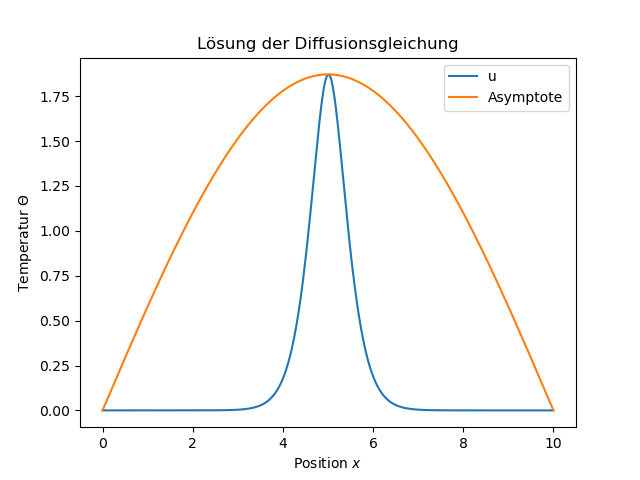

CPU times: user 79.5 ms, sys: 6.96 ms, total: 86.5 ms
Wall time: 86 ms


In [50]:
%%time
T = 1.0e-1
alpha = 100.51
N_X = 500
L = 10
D = 1.0
dx = L/(N_X-1)
dt = alpha*dx**2/D

diag0 = (1 + 2*alpha) * np.ones(N_X)
diag1 = -alpha*np.ones(N_X)
data = np.array([diag1, diag0, diag1])
LInv = sparse.spdiags(data, (-1, 0, 1), N_X, N_X)
LInv = LInv.tocsr()

u_0 = np.zeros(N_X)
u_0[N_X//2] = 100
# u_0[-1] = 22  # mögliche andere Randbedingung
# u_0[0] = 42
x = np.linspace(0, L, N_X)
u = u_0.copy() # Alternativ in numpy: u = 1*u_0

t = 0
while t < T:
    u = spsolve(LInv, u)
    #u[1:-1] = (1 - 2*alpha)*u[1:-1] + alpha*(u[0:-2] + u[2:])
    t += dt

A1 = np.max(u)

plt.figure()
plt.plot(x,u)
plt.plot(x, A1*np.sin(x*np.pi/L))
plt.title("Lösung der Diffusionsgleichung")
plt.legend(["u", "Asymptote"])
plt.xlabel("Position $x$")
plt.ylabel(r"Temperatur $\Theta$")
plt.show()

u_impl = u.copy()

## Lösung der Diffusionsgleichung mit Crank-Nicolson

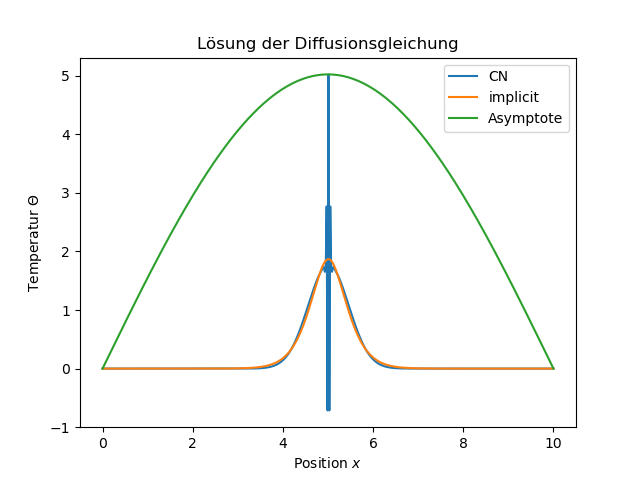

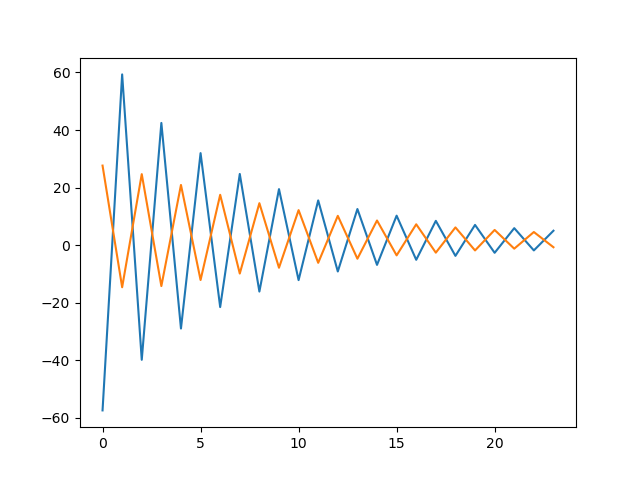

CPU times: user 307 ms, sys: 31.4 ms, total: 339 ms
Wall time: 336 ms


In [56]:
%%time
T = 1.0e-1
alpha = 10.51
N_X = 500
L = 10
D = 1.0
dx = L/(N_X-1)
dt = alpha*dx**2/D

diag0_M = (1 + alpha) * np.ones(N_X)
diag1_M = -0.5*alpha*np.ones(N_X)
data = np.array([diag1_M, diag0_M, diag1_M])
M = sparse.spdiags(data, (-1, 0, 1), N_X, N_X)
M = M.tocsr()

diag0_L = (1 - alpha) * np.ones(N_X)
diag1_L = 0.5*alpha*np.ones(N_X)
data = np.array([diag1_L, diag0_L, diag1_L])
LRHS = sparse.spdiags(data, (-1, 0, 1), N_X, N_X)
LRHS = LRHS.tocsr()


u_0 = np.zeros(N_X)
u_0[N_X//2] = 100
# u_0[-1] = 22  # mögliche andere Randbedingung
# u_0[0] = 42
x = np.linspace(0, L, N_X)
u = u_0.copy() # Alternativ in numpy: u = 1*u_0

p0_hist = []
p1_hist = []

t = 0
while t < T:
    u = LRHS @ u
    u = spsolve(M, u)
    p0_hist.append(u[N_X//2])
    p1_hist.append(u[N_X//2 + 1])
    #u[1:-1] = (1 - 2*alpha)*u[1:-1] + alpha*(u[0:-2] + u[2:])
    t += dt

A1 = np.max(u)

plt.figure()
plt.plot(x,u)
plt.plot(x, u_impl)
plt.plot(x, A1*np.sin(x*np.pi/L))
plt.title("Lösung der Diffusionsgleichung")
plt.legend(["CN", "implicit", "Asymptote"])
plt.xlabel("Position $x$")
plt.ylabel(r"Temperatur $\Theta$")
plt.show()
                   
plt.figure()
plt.plot(p0_hist)
plt.plot(p1_hist)
plt.show()